In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")
from tapm import model_HIVandSTI
from tapm import utils
import icomo
import diffrax
import numpy as np

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.


In [2]:
args, y0 = utils.read_params(filename="../src/tapm/HIVandSTI/model_HIVandSTI.py")
#integrator = model_HIVandSTI.setup_model()

In [3]:
#output = integrator(y0=y0, constant_args=args)
output = icomo.diffeqsolve(args=args, ODE = model_HIVandSTI.main_model, y0 = y0, ts_out = np.linspace(0, 36000, 3600))

INFO:tapm.HIVandSTI.model_HIVandSTI:Using exponential function to calculate m
INFO:tapm.HIVandSTI.model_HIVandSTI:Parameters: min_exp = 0.0, max_exp = 1.0, tau_exp = 0.2


In [8]:
def n_observed(args, y):
    out = args["lambda_s"]*jnp.sum(jnp.array([y["Is1_STI"], y["Is2_STI"], y["Is3_STI"], y["Is4_STI"]]))+model_HIVandSTI.lambda_a(args=args, y=y)*jnp.sum(jnp.array([y["Ia1_STI"], y["Ia2_STI"], y["Ia3_STI"], y["Ia4_STI"]]))
    return out

In [9]:
n_observed(args, y0)

Array(764.58333333, dtype=float64)

In [4]:
output.ys["H"][9, :]

Array([378.5363993 , 378.58322193], dtype=float64)

In [13]:
def calculate_N_array(y): # number of people per risk group for a given state y (which means at a given time)
    totalNs = []
    for i in range(len(y["S1"])):
        N1 = jnp.sum(jnp.array([y["S1"][i],y["SP1"][i],y["I11"][i],y["IP11"][i],y["I12"][i],y["I13"][i],y["I14"][i],y["A11"][i],y["A12"][i],y["A13"][i],y["A14"][i]]))
        N2 = jnp.sum(jnp.array([y["S2"][i],y["SP2"][i],y["I21"][i],y["IP21"][i],y["I22"][i],y["I23"][i],y["I24"][i],y["A21"][i],y["A22"][i],y["A23"][i],y["A24"][i]]))
        N3 = jnp.sum(jnp.array([y["S3"][i],y["SP3"][i],y["I31"][i],y["IP31"][i],y["I32"][i],y["I33"][i],y["I34"][i],y["A31"][i],y["A32"][i],y["A33"][i],y["A34"][i]]))
        N4 = jnp.sum(jnp.array([y["S4"][i],y["SP4"][i],y["I41"][i],y["IP41"][i],y["I42"][i],y["I43"][i],y["I44"][i],y["A41"][i],y["A42"][i],y["A43"][i],y["A44"][i]]))
        totalNs.append(jnp.sum(jnp.array([N1,N2,N3,N4])))
    return totalNs
totalNs = calculate_N_array(output.ys)

In [5]:
output.ys["A11"]

Array([9.471     , 9.50533645, 9.53497933, ..., 1.66793521, 1.66762815,
       1.66732119], dtype=float64)

In [19]:
print(output.ys["I11"]+output.ys["IP11"]+output.ys["I12"]+output.ys["I13"]+output.ys["I14"])

[115.5462     114.42835671 113.32539129 ...   3.89706369   3.89616244
   3.89526168]


Key: A11, Last Value: 1.76044893557557e-05
Key: A12, Last Value: 0.00016623431312351268
Key: A13, Last Value: 9.24478507526285e-06
Key: A14, Last Value: 1.1380816145294919e-05
Key: A21, Last Value: 0.0002029157435707098
Key: A22, Last Value: 0.0018631237089443559
Key: A23, Last Value: 0.0001036539191461298
Key: A24, Last Value: 0.0001274463599318721
Key: A31, Last Value: 0.0009161547146619383
Key: A32, Last Value: 0.008972490729434695
Key: A33, Last Value: 0.000498778978766154
Key: A34, Last Value: 0.0006149807491426973
Key: A41, Last Value: 0.005728117106239736
Key: A42, Last Value: 0.050325892359889206
Key: A43, Last Value: 0.002802812672671837
Key: A44, Last Value: 0.0034385872961434152
Key: H, Last Value: [nan nan]
Key: I11, Last Value: 1.0382104832817825e-06
Key: I12, Last Value: 3.238617528495094e-05
Key: I13, Last Value: 3.5491155500389507e-06
Key: I14, Last Value: 3.1695517097726285e-06
Key: I21, Last Value: 1.1969783214506776e-05
Key: I22, Last Value: 0.00036725429725831363
Ke

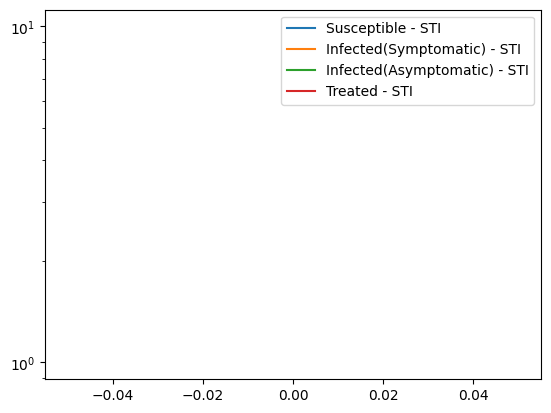

In [4]:
#plt.plot(output.ys["I11"]+output.ys["IP11"]+output.ys["I12"]+output.ys["I13"]+output.ys["I14"], label="Infected - Risk group 1")
#plt.plot(output.ys["A11"]+output.ys["A12"]+output.ys["A13"]+output.ys["A14"], label="ART - Risk group 1")
#plt.plot(output.ys["I21"]+output.ys["IP21"]+output.ys["I22"]+output.ys["I23"]+output.ys["I24"], label="Infected - Risk group 2")
#plt.plot(output.ys["A21"]+output.ys["A22"]+output.ys["A23"]+output.ys["A24"], label="ART - Risk group 2")
#plt.plot(output.ys["I31"]+output.ys["IP31"]+output.ys["I32"]+output.ys["I33"]+output.ys["I34"], label="Infected - Risk group 3")
#plt.plot(output.ys["A31"]+output.ys["A32"]+output.ys["A33"]+output.ys["A34"], label="ART - Risk group 3")
#plt.plot(output.ys["I41"]+output.ys["IP41"]+output.ys["I42"]+output.ys["I43"]+output.ys["I44"], label="Infected - Risk group 4")
#plt.plot(output.ys["A41"]+output.ys["A42"]+output.ys["A43"]+output.ys["A44"], label="ART - Risk group 4")
plt.plot(output.ys["S1_STI"]+output.ys["S2_STI"]+output.ys["S3_STI"]+output.ys["S4_STI"], label="Susceptible - STI")
plt.plot(output.ys["Is1_STI"]+output.ys["Is2_STI"]+output.ys["Is3_STI"]+output.ys["Is4_STI"], label="Infected(Symptomatic) - STI")
plt.plot(output.ys["Ia1_STI"]+output.ys["Ia2_STI"]+output.ys["Ia3_STI"]+output.ys["Ia4_STI"], label="Infected(Asymptomatic) - STI")
plt.plot(output.ys["T1_STI"]+output.ys["T2_STI"]+output.ys["T3_STI"]+output.ys["T4_STI"], label="Treated - STI")
plt.yscale('log')
plt.legend()
riskgroups = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,1,2,3,4,1,2,3,4,1,2,3,4,1,1,2,2,3,3,4,4,1,2,3,4,1,2,3,4]
N0 = 210000 # initial population size
N01 = 0.451*N0 # initial population size of risk group 1
N02 = 0.353*N0 # initial population size of risk group 2
N03 = 0.125*N0 # initial population size of risk group 3
N04 = 0.071*N0 # initial population size of risk group 4
N0s = [N01,N02,N03,N04]
# Summing the values for each risk group
i = 0
sums = [0, 0, 0, 0]
for key, value in output.ys.items():
    val = value[-1] / N0s[riskgroups[i] - 1]
    print(f"Key: {key}, Last Value: {val}")
    if key != "H":
        sums[riskgroups[i] - 1] += val
    i += 1

print(sums)